# Produktionsplanung
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Einführung in die Modellierung
Erstellt von Sebastian Knall, am 29.03.2022

#### Das vorliegene Notebook bezieht sich auf das Beispiel 1 in der Vorlesung Einführung in die Modellierung - Produktionsplanung

#### Es soll einen einfachen Einstieg in eine mögliche Lösung des Problems bieten.
#### Hierbei wurde als Solver "PulP" benutzt. Die PulP Bibliothek ist frei mit "pip install pulp" erhältlich.

#### In der vorliegenden möglichen Lösung wurde bewusst ein sehr einfacher Code verwendet. Er soll als Einstieg und Bindeglied zwischen Vorlesung und Python-Programmierung dienen. 

#### Hierbei wurden sämtliche Parameter direkt und einzeln, eins zu eins in Code übertragen.

#### Für einen Einblick, wie ein generischer Python Code mit "PulP" als Solver aussehen könnte, besuchen Sie:

https://mybinder.org/v2/gh/QuantitativeMethoden/Management-Science/HEAD 

#### Für einen Einblick, wie ein generischer Python Code mit "Gurobi" als Solver aussehen könnte, besuchen Sie:

https://mybinder.org/v2/gh/QuantitativeMethoden/Management-Science/HEAD

#### Zum ausführen der Notebooks benötigen Sie eine Lizenz für Gurobi, diese ist unter www.gurobi.com für Studenten kostenfrei erhältlich.

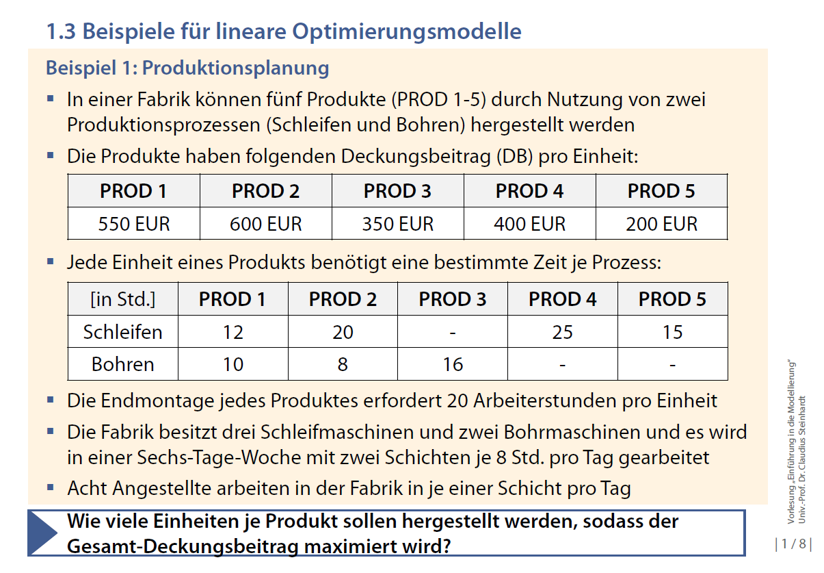

In [1]:
# Importieren der nötigen Bibliotheken
import pulp
from pulp import *

In [2]:
# Erstellen eines neuen PulP-Modells, Festlegen der Maximierung
prob = LpProblem("ProdPlan", LpMaximize)

In [3]:
# Erstellen der Variablen
## PulP Variablen bestehen aus vier Parametern: Name, Untere Grenze, Obere Grenze und diskret oder linear
### Ist kein Wert für ein Parameter angegeben, so nimmt PulP Standartwerte vor.

x1 = LpVariable("Produkt1", 0, None, LpInteger)
x2 = LpVariable("Produkt2", 0, None, LpInteger)
x3 = LpVariable("Produkt3", 0, None, LpInteger)
x4 = LpVariable("Produkt4", 0, None, LpInteger)
x5 = LpVariable("Produkt5", 0, None, LpInteger)


In [4]:
# Festlegen der Zielfunktion
prob += 550 * x1 + 600 * x2 + 350 * x3 + 400 * x4 + 200 * x5 

In [5]:
# Unter Nebenbedingung 1: Schleifmaschinenkapazität
prob += 12 * x1 + 20 * x2 + 25 * x4 + 15 * x5 <= 288, "NB01"

In [6]:
# Unter der Nebenbedingung 2: Bohrmaschinenkapazität
prob += 10 * x1 + 8 * x2 + 16 * x3 <= 192, "NB02"

In [7]:
# Unter der Nebenbedingung 3: Arbeitskapazität
prob += 20 * x1 + 20 * x2 + 20 * x3 + 20 * x4 + 20 * x5 <= 384, "NB03"

In [8]:
# Unter der Nebenbedingung 4: Nichtnegativität
## Bereits bei der Erstellung der Variablen durch die untere Grenze von "0" gegeben.

In [9]:
#Problem in eine .lp Datei speichern
prob.writeLP("PP.lp")

[Produkt1, Produkt2, Produkt3, Produkt4, Produkt5]

In [10]:
# Modell lösen
prob.solve()

1

In [11]:
# Augeben des Status
print("Status:", LpStatus[prob.status])

Status: Optimal


In [12]:
# Ausgeben der Mengen für die jeweilige Variablen
for v in prob.variables():
    print(v.name, "=", v.varValue)
        
# Ausgeben Optimaler Zielfunktionswert
print("Optimaler Zielfunktionswert:", value(prob.objective), "GE")

Produkt1 = 12
Produkt2 = 7
Produkt3 = 0
Produkt4 = 0
Produkt5 = 0
Optimaler Zielfunktionswert: 10800 GE
